In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from lambeq.backend.quantum import Ry, Diagram, Bra, Rx, Rz
from util import data_loader, gen_bloch_states, gen_contexts, gen_states
from contextuality.model import chsh_scenario, Model
import seaborn as sns
from funcs import calc_vne, partial_trace, state2dense, gen_basis, calc_violation, get_table, rand_state
from lambeq.backend.numerical_backend import backend, get_backend
from tqdm import tqdm

In [2]:
x_basis = gen_basis(np.pi/2, 0)
y_basis = gen_basis(np.pi/2, np.pi/2)
z_basis = gen_basis()

onb1 = gen_basis(np.pi/2, np.pi/8)
onb2 = gen_basis(np.pi/2, 5*np.pi/8)

contexts_max = {'ab': np.kron(onb1[0], onb1[0]), 
                'aB': np.kron(onb1[0], onb2[0]), 
                'Ab': np.kron(onb2[0], onb1[0]), 
                'AB': np.kron(onb2[0], onb2[0])}

In [34]:
contexts = gen_contexts(100)
states = gen_states(1000)

In [35]:
scenario = chsh_scenario()
cf_arr = []
for state in tqdm(states):
    for context in contexts:
        emp_model = Model(scenario, get_table(state, context))
        cf_arr.append(emp_model.contextual_fraction())
cf_arr = np.array(cf_arr)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1295/1295 [04:49<00:00,  4.47it/s]


In [37]:
embeddings = []
for state in tqdm(states):
    i = 0
    ans = 0
    for amp in state:
        ans += np.round(abs(amp), 3)*(10**(3*(3-i)))
        i += 1
    embeddings.append(ans)
embeddings = np.array(embeddings)
embeddings /= max(embeddings)
embeddings *= np.pi
phi_arr = np.linspace(0, np.pi, 100)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1295/1295 [00:00<00:00, 80618.99it/s]


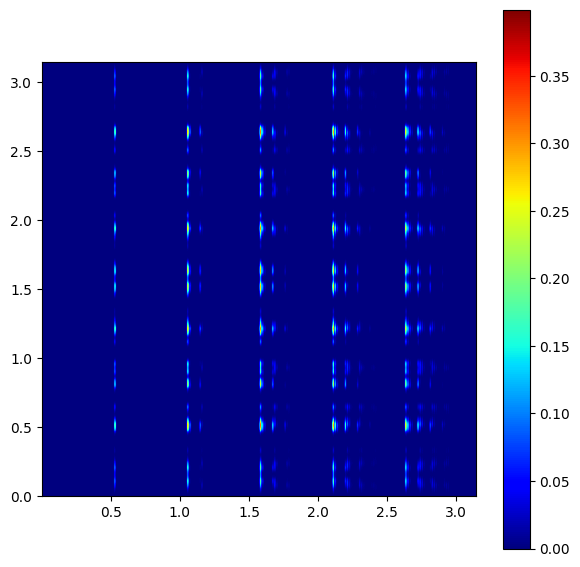

In [38]:
plot_heatmap(embeddings, phi_arr, cf_arr)

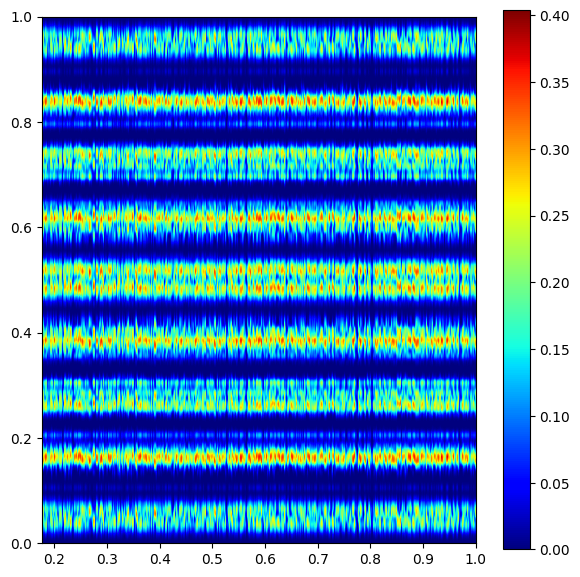

In [13]:
plot_heatmap(embeddings, phi_arr, cf_arr)

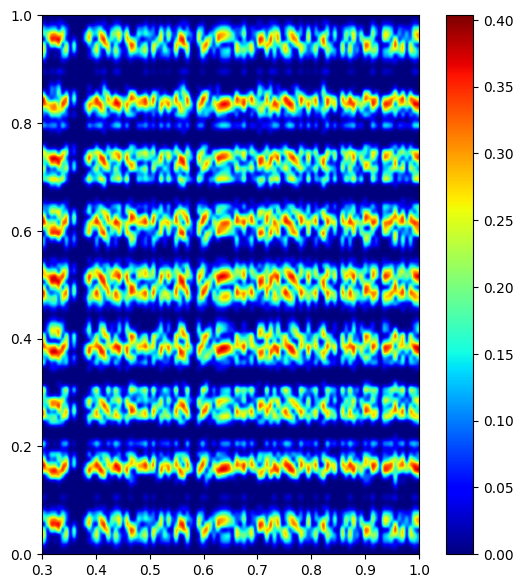

In [9]:
plot_heatmap(embeddings, phi_arr, cf_arr)

In [8]:
def plot_heatmap(x, y, z):
    X,Y = np.meshgrid(x,y)
    Z=z.reshape(len(x),len(y))
    Z=np.transpose(Z)
    plt.figure(figsize=(7,7), dpi=100)
    plt.imshow(Z , cmap = 'jet' , interpolation = 'gaussian' , 
           origin='lower', aspect='equal',  extent = [min(x), max(x), min(y), max(y)])
    plt.colorbar()
    #plt.savefig('figures/heatmap22')
    #return fig

In [31]:
def plot_scatter(fig, x, y, z):
    cmap = plt.get_cmap('viridis_r')
    cmap.set_under('red')
    scat = fig.scatter(x=x, y=y, c=z, cmap=cmap, vmin=0, vmax=1)
    fig.set_alpha(0.5)
    plt.colorbar(scat, extend='min')
    return fig

In [66]:
import pandas as pd
df = pd.read_csv('dataset/original_data/test.csv')

In [67]:
unique_refs = set(df['referent'])

In [68]:
row = df.iloc[0]

In [54]:
from util import sent2dig

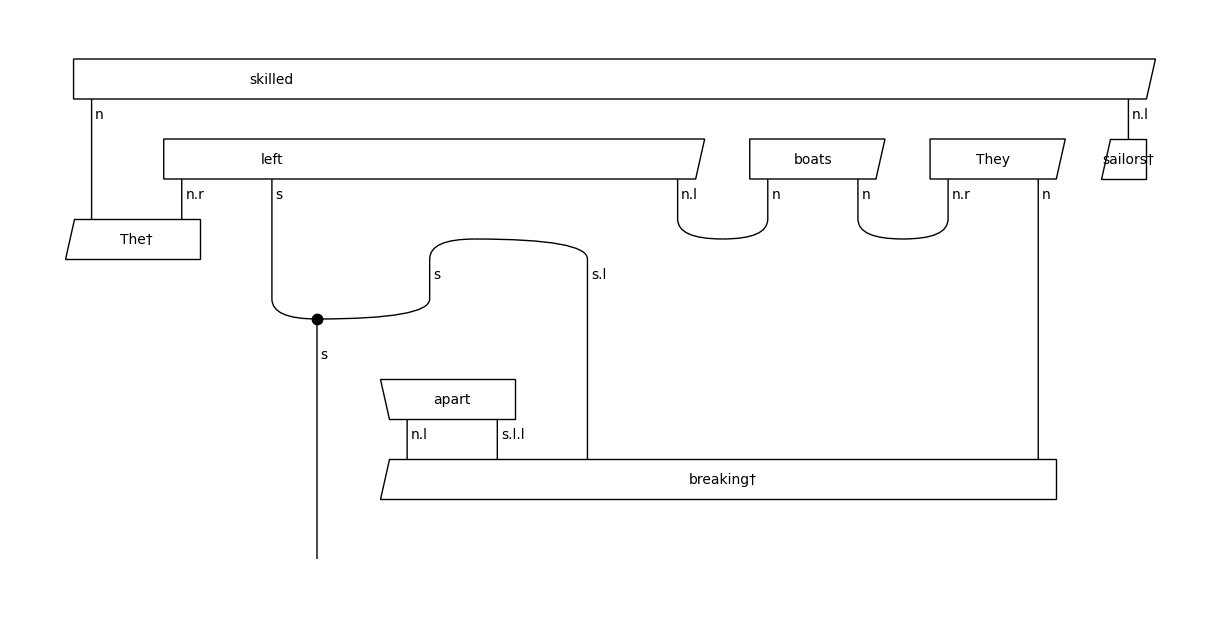

In [62]:
sent2dig(row['sentence1'], row['sentence2'], row['pronoun'], row['referent'], 'spider').draw(figsize=(12,6))

In [22]:
import pandas as pd
from tqdm import tqdm
df = pd.read_csv('dataset/original_data/test.csv')
subj_obj = {'subj': ['heart', 'sailors', 'students', 'knife', 'storm', 'bee', 'birds', 'police', 'people', 'sniper'], 
            'obj': ['blood', 'boats', 'books', 'fence', 'flight', 'flower', 'seeds', 'criminals', 'government', 'terrorist']}

In [34]:
df

,Unnamed: 0,sentence1,sentence2,pronoun,referent,wrong_referent
0,0,The knife scraped the school fence rapidly,It was enclosing the private property,It,fence,knife
1,1,The skillful heart pushed muscle-oxygenating b...,It was a life-invigorating fluid,It,blood,heart
2,2,The resourceful sailors escaped off the boats,They were suffering structural damage,They,boats,sailors
3,3,The storm caused a delay for the morning flight,It was producing tornadoes,It,storm,flight
4,4,The heart pumped blood that maintained life,It was a blood-pressure-controlling liquid,It,blood,heart
...,...,...,...,...,...,...
3275,3275,The dull knife cut through the fence effortlessly,It was easily cut,It,fence,knife
3276,3276,The indomitable heart drove blood-pressure-con...,It was a vital fluid,It,blood,heart
3277,3277,The acrobatic birds explored the seeds,They were filled with vitamins,They,seeds,birds
3278,3278,The powerful knife scraped the swimming fence ...,It was a rusted and weak,It,fence,knife


In [25]:
subj_ref = []
obj_ref = []
for i, row in tqdm(df.iterrows()):
    ref = row['referent']
    if ref in subj_obj['subj']:
        subj_ref.append(row)
    else:
        obj_ref.append(row)

3280it [00:00, 51930.67it/s]
